<a href="https://colab.research.google.com/github/lamisghoualmi/App-Personal-Key-Indicators-of-Heart-Disease/blob/main/HeartDisease_Analysis_Prediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analisis dan Prediksi Penyakit Jantung**

In [3]:
import numpy as np
import pandas  as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')




**Gambaran Statistik dari Dataset**

In [4]:
# kode tersebut memberikan gambaran awal tentang dataset, seperti ukuran data, jenis variabel, dan statistik deskriptifnya
#Membaca data
df=pd.read_csv("heart_2020_cleaned.csv")
df
# ukuran data
print('df size', df.shape)
#Variables and their type
df.info()
#Mendapatkan statistik deskriptif variabel numerik 
df.describe()


df size (319795, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16 

BMI  PhysicalHealth   MentalHealth      SleepTime
count  319795.000000    319795.00000  319795.000000  319795.000000
mean       28.325399         3.37171       3.898366       7.097075
std         6.356100         7.95085       7.955235       1.436007
min        12.020000         0.00000       0.000000       1.000000
25%        24.030000         0.00000       0.000000       6.000000
50%        27.340000         0.00000       0.000000       7.000000
75%        31.420000         2.00000       3.000000       8.000000
max        94.850000        30.00000      30.000000      24.000000

**Hapus Duplikat dan Periksa Persentase Nilai yang Hilang per Variabel**

In [5]:
# kode tersebut membersihkan data dengan menghapus duplikat dan menghitung persentase data hilang untuk setiap variabel. 
# Dapat membantu dalam mengidentifikasi masalah data yang hilang dan merencanakan langkah selanjutnya dalam analisis data.
#Remove duplicates from the dataset
df=df.drop_duplicates()
print('new df size', df.shape)
#------------------Check percentage of missing values for each variables----
for col in df.columns:
    PercentageMissing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(PercentageMissing *100)))

new df size (301717, 18)
HeartDisease - 0%
BMI - 0%
Smoking - 0%
AlcoholDrinking - 0%
Stroke - 0%
PhysicalHealth - 0%
MentalHealth - 0%
DiffWalking - 0%
Sex - 0%
AgeCategory - 0%
Race - 0%
Diabetic - 0%
PhysicalActivity - 0%
GenHealth - 0%
SleepTime - 0%
Asthma - 0%
KidneyDisease - 0%
SkinCancer - 0%



**Deskripsi Statistik dan Visualisasi Variabel Kategorikal**

____________________________________________________________________________________
Variable name: Smoking
Unique values are: ['Yes' 'No']
Number of unique values: 2
Frequency of each unique value in a catagorical variable
Smoking
No     174312
Yes    127405
Name: count, dtype: int64
____________________________________________________________________________________
Variable name: PhysicalActivity
Unique values are: ['Yes' 'No']
Number of unique values: 2
Frequency of each unique value in a catagorical variable
PhysicalActivity
Yes    230412
No      71305
Name: count, dtype: int64
____________________________________________________________________________________
Variable name: Stroke
Unique values are: ['No' 'Yes']
Number of unique values: 2
Frequency of each unique value in a catagorical variable
Stroke
No     289653
Yes     12064
Name: count, dtype: int64
____________________________________________________________________________________
Variable name: Race
Unique values are: ['

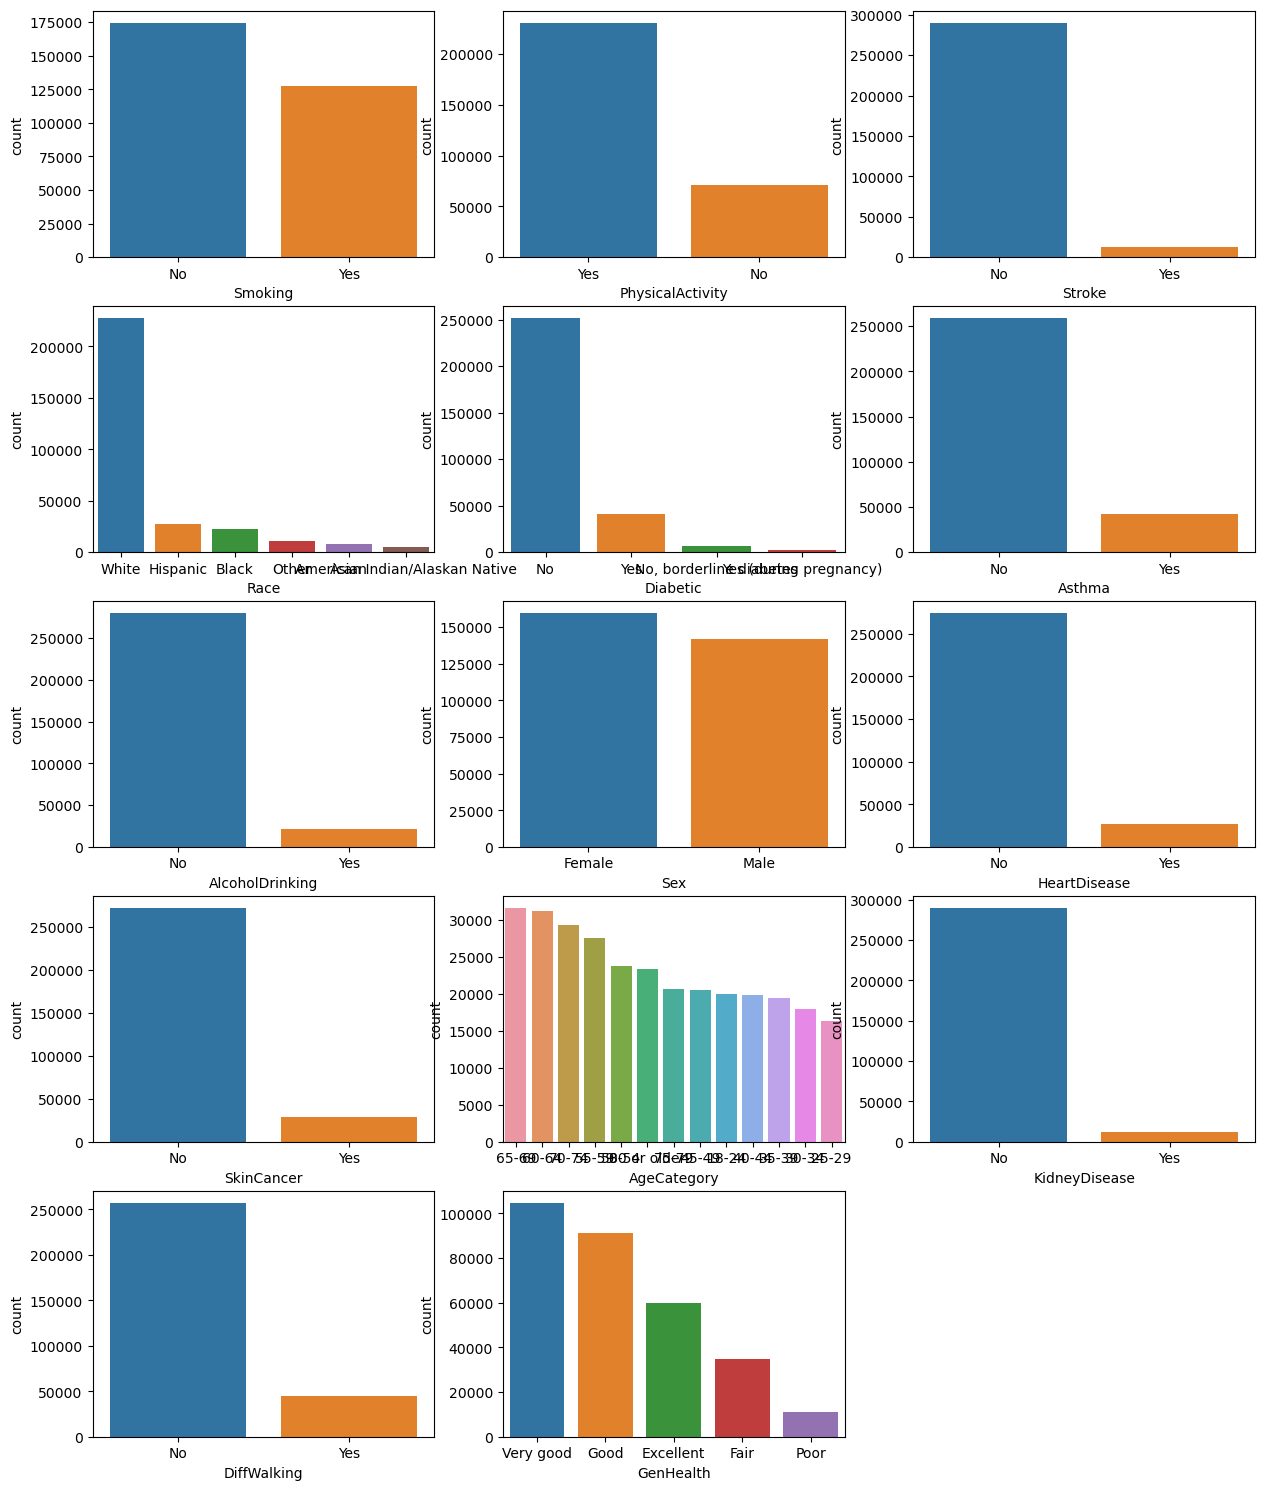

In [6]:

# menganalisis dan memvisualisasikan data kategorikal dalam dataset "df"
cols = df.columns
num_cols = df._get_numeric_data().columns
Categ_cols=list(set(cols) - set(num_cols))
lenght=len(Categ_cols)

plt.figure(figsize = (15,30))
for i in range (lenght):
    print('____________________________________________________________________________________')
    #Variable
    print('Variable name:' ,Categ_cols[i])
    #Unique values 
    print('Unique values are:', df[Categ_cols[i]].unique())
    #Number of unique values
    print('Number of unique values:',df[Categ_cols[i]].nunique())
    # Frequencies of categorical variables
    FreqValue=df[Categ_cols[i]].value_counts()
    print('Frequency of each unique value in a catagorical variable')
    print(FreqValue)
    #Visualization of the categoricals data
    #fig = plt.figure(figsize=(10,6))
    plt.subplot(8,3,i+1)
    #plt.title(Categ_cols[i],fontsize=15)
    ax = sns.countplot(x=df[Categ_cols[i]],  order=df[Categ_cols[i]].value_counts(ascending=False).index);

# 

In [7]:
pip install dabl

Note: you may need to restart the kernel to use updated packages.


**Visualisasi dengan membuat berbagai plot termasuk: Diagram Batang untuk distribusi target, Plot Pencar Pair, Analisis Diskriminan Linier**

Target looks like classification
Linear Discriminant Analysis training set score: 0.501


[<Axes: title={'center': 'Target distribution'}, xlabel='count', ylabel='HeartDisease'>,
 [array([[<Axes: ylabel='BMI'>, <Axes: >, <Axes: >, <Axes: >],
         [<Axes: ylabel='PhysicalHealth'>, <Axes: >, <Axes: >, <Axes: >],
         [<Axes: ylabel='MentalHealth'>, <Axes: >, <Axes: >, <Axes: >],
         [<Axes: xlabel='BMI', ylabel='SleepTime'>,
          <Axes: xlabel='PhysicalHealth'>, <Axes: xlabel='MentalHealth'>,
          <Axes: xlabel='SleepTime'>]], dtype=object),
  <Figure size 1600x400 with 4 Axes>,
  <Figure size 640x480 with 1 Axes>],
 array([[<Axes: title={'center': 'AgeCategory'}>,
         <Axes: title={'center': 'GenHealth'}>,
         <Axes: title={'center': 'DiffWalking'}>,
         <Axes: title={'center': 'Diabetic'}>],
        [<Axes: title={'center': 'Smoking'}>,
         <Axes: title={'center': 'PhysicalActivity'}>,
         <Axes: title={'center': 'SkinCancer'}>,
         <Axes: title={'center': 'Sex'}>],
        [<Axes: title={'center': 'Race'}>,
         <Axe

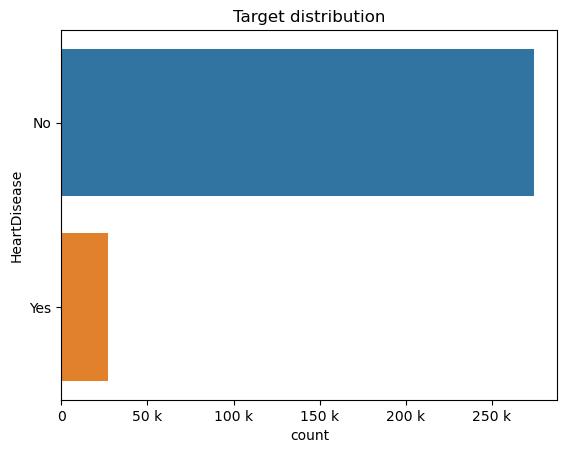

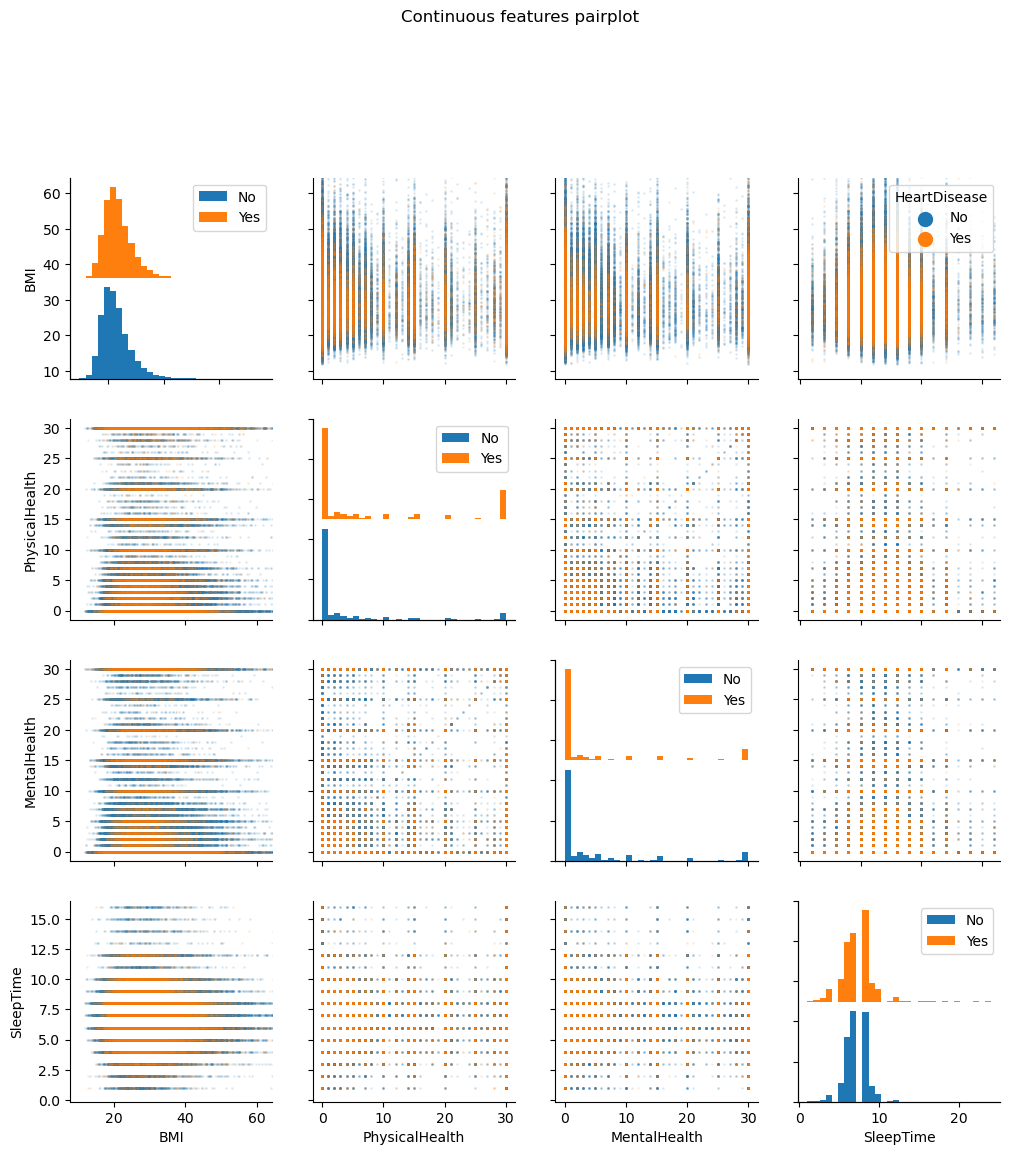

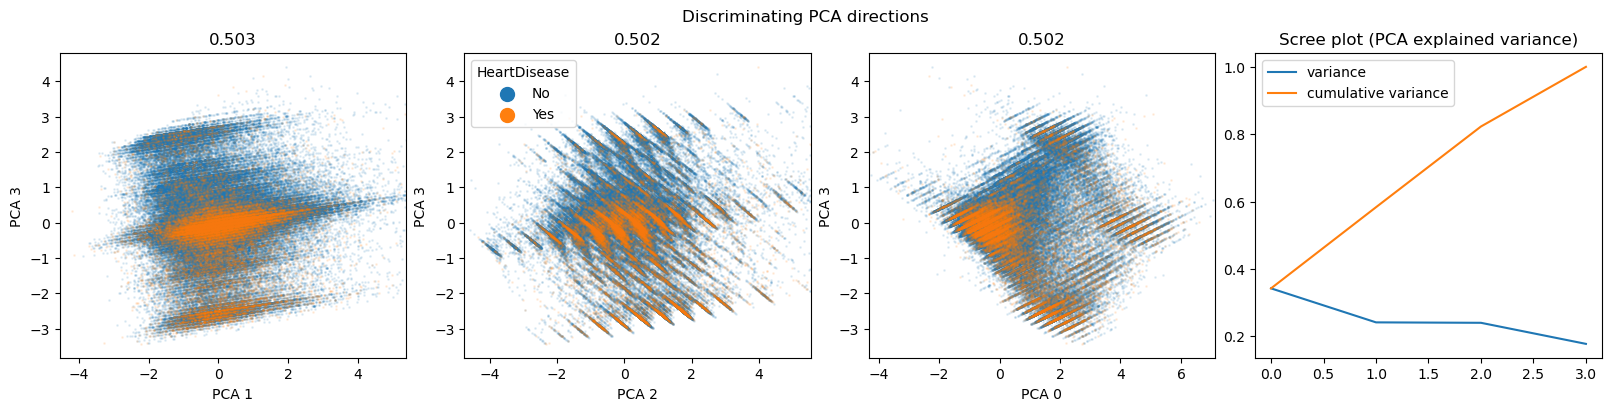

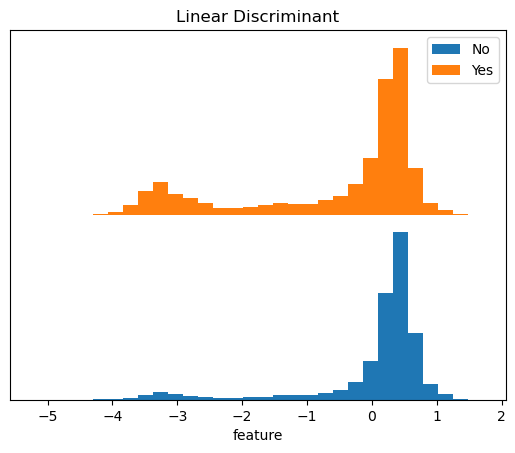

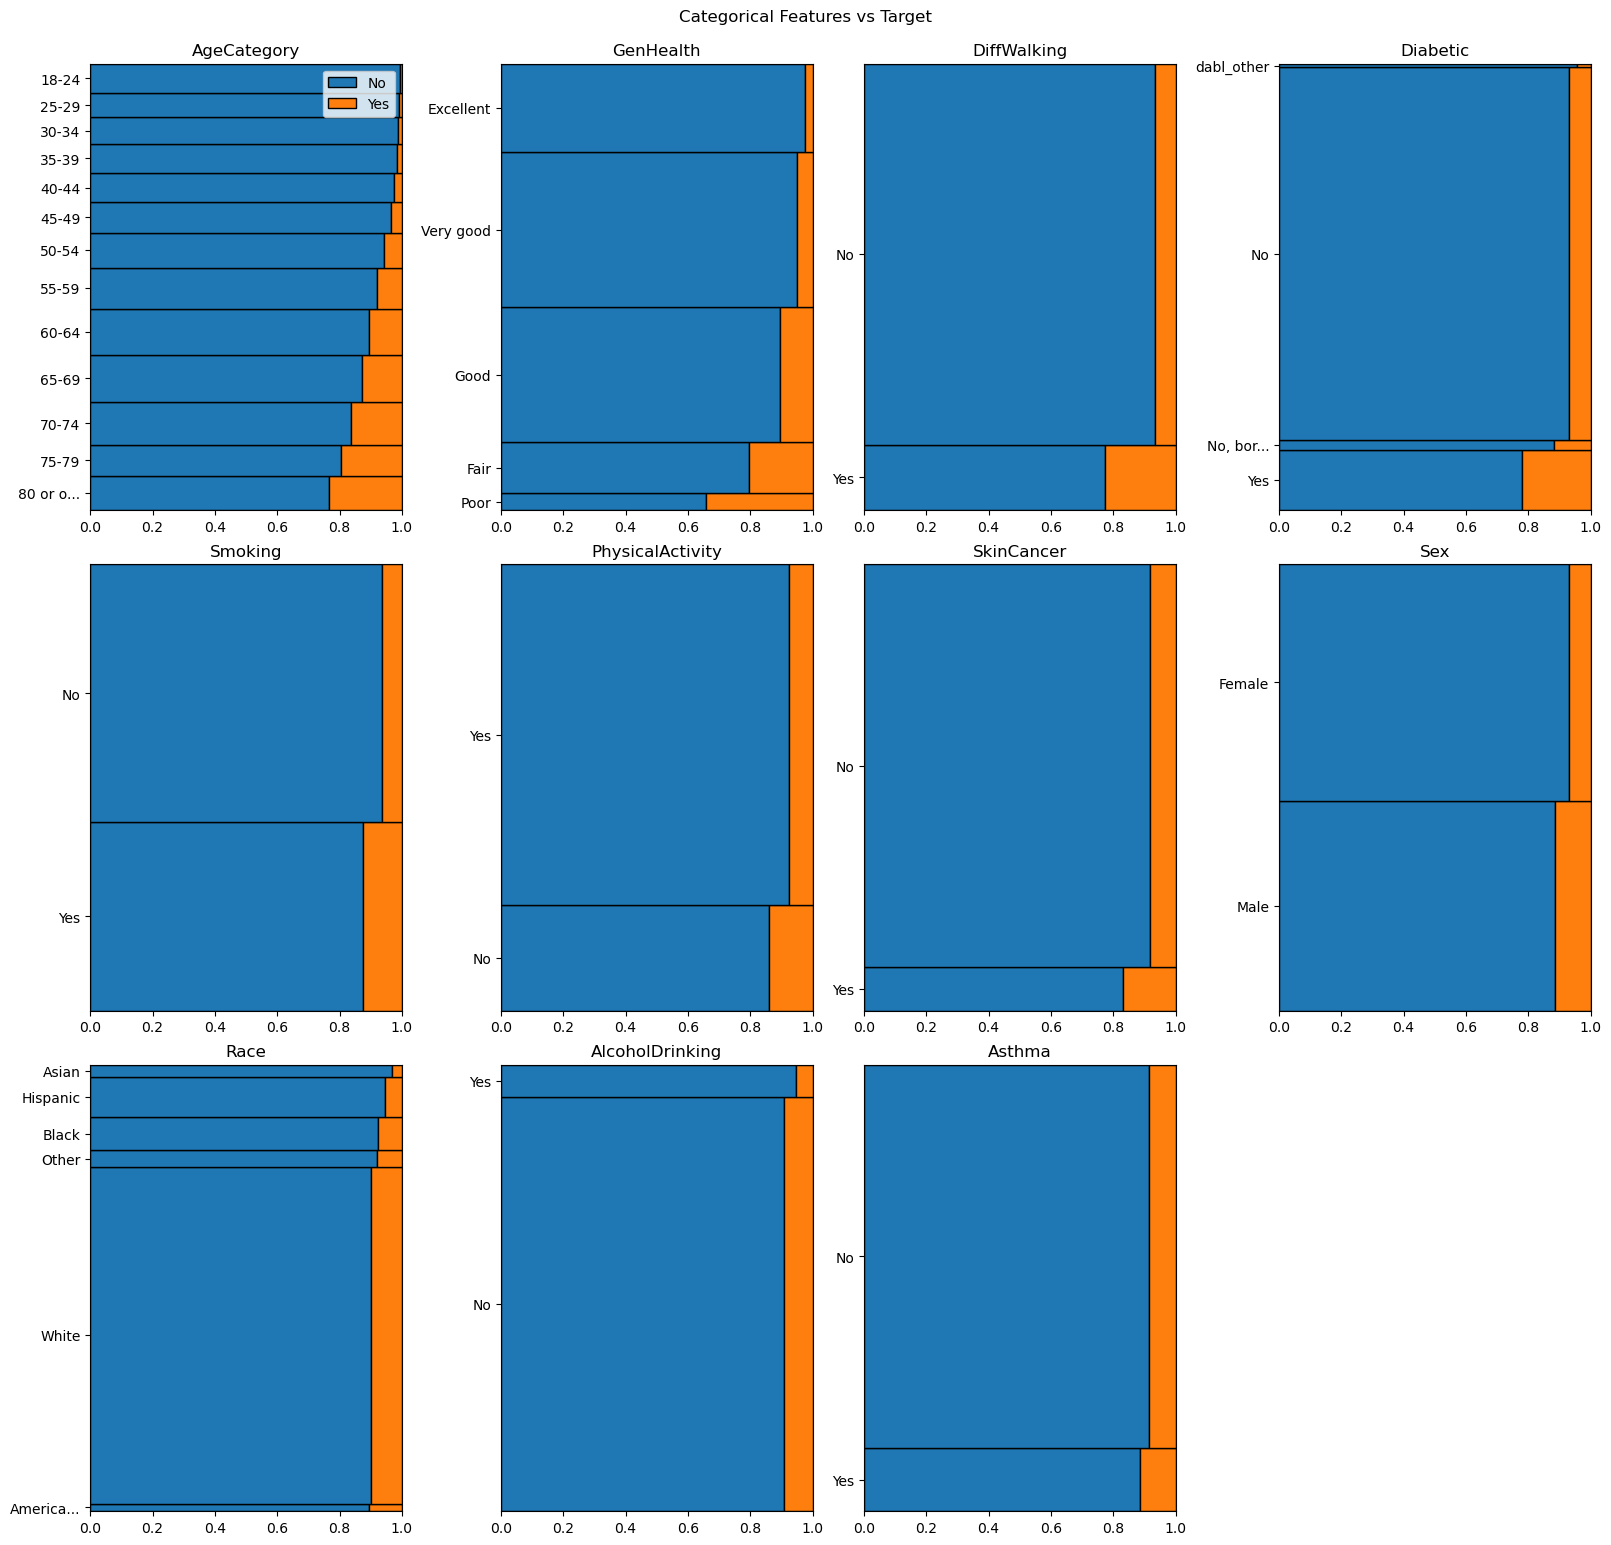

In [8]:
import dabl
# membuat plot distribusi variabel numerik dalam dataset "df" dengan memisahkan berdasarkan variabel target "HeartDisease".
dabl.plot(df, target_col='HeartDisease')

**Pemetaan Data untuk Menyiapkan Data dan Membangun Model Prediksi**

In [9]:
# ----------------------------------MAPPING------------------------
# mengubah nilai-nilai string dalam dataframe df menjadi nilai-nilai numerik.
# Mengubah nilai "Yes" menjadi 1 pada semua kolom dataframe.
# Mengubah nilai "No" menjadi 0.
df.replace("Yes",1,inplace=True)
df.replace("No",0,inplace=True)

df.replace("18-24",0,inplace=True)
df.replace("25-29",1,inplace=True)
df.replace("30-34",2,inplace=True)
df.replace("35-39",3,inplace=True)
df.replace("40-44",4,inplace=True)
df.replace("45-49",5,inplace=True)
df.replace("50-54",6,inplace=True)
df.replace("55-59",7,inplace=True)
df.replace("60-64",8,inplace=True)
df.replace("65-69",9,inplace=True)
df.replace("70-74",10,inplace=True)
df.replace("75-79",11,inplace=True)
df.replace("80 or older",12,inplace=True)


df.replace("No, borderline diabetes",2,inplace=True)
df.replace("Yes (during pregnancy)",3,inplace=True)


df.replace("Excellent",0,inplace=True)
df.replace("Good",1,inplace=True)
df.replace("Fair",2,inplace=True)
df.replace("Very good",3,inplace=True)
df.replace("Poor",4,inplace=True)


df.replace("White",0,inplace=True)
df.replace("Other",1,inplace=True)
df.replace("Black",2,inplace=True)
df.replace("Hispanic",3,inplace=True)
df.replace("Asian",4,inplace=True)
df.replace("American Indian/Alaskan Native",4,inplace=True)


df.replace("Female",0,inplace=True)
df.replace("Male",1,inplace=True)


df

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0                  0  16.60        1                0       0               3   
1                  0  20.34        0                0       1               0   
2                  0  26.58        1                0       0              20   
3                  0  24.21        0                0       0               0   
4                  0  23.71        0                0       0              28   
...              ...    ...      ...              ...     ...             ...   
319790             1  27.41        1                0       0               7   
319791             0  29.84        1                0       0               0   
319792             0  24.24        0                0       0               0   
319793             0  32.81        0                0       0               0   
319794             0  46.56        0                0       0               0   

        MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0                 30            0    0            7     0         1   
1                  0            0    0           12     0         0   
2                 30            0    1            9     0         1   
3                  0            0    0           11     0         0   
4                  0            1    0            4     0         0   
...              ...          ...  ...          ...   ...       ...   
319790             0            1    1            8     3         1   
319791             0            0    1            3     3         0   
319792             0            0    0            5     3         0   
319793             0            0    0            1     3         0   
319794             0            0    0           12     3         0   

        PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  \
0                      1          3          5       1              0   
1                      1          3          7       0              0   
2                      1          2          8       1              0   
3                      0          1          6       0              0   
4                      1          3          8       0              0   
...                  ...        ...        ...     ...            ...   
319790                 0          2          6       1              0   
319791                 1          3          5       1              0   
319792                 1          1          6       0              0   
319793                 0          1         12       0              0   
319794                 1          1          8       0              0   

        SkinCancer  
0                1  
1                0  
2                0  
3                1  
4                0  
...            ...  
319790           0  
319791           0  
319792           0  
319793           0  
319794           0  

[301717 rows x 18 columns]

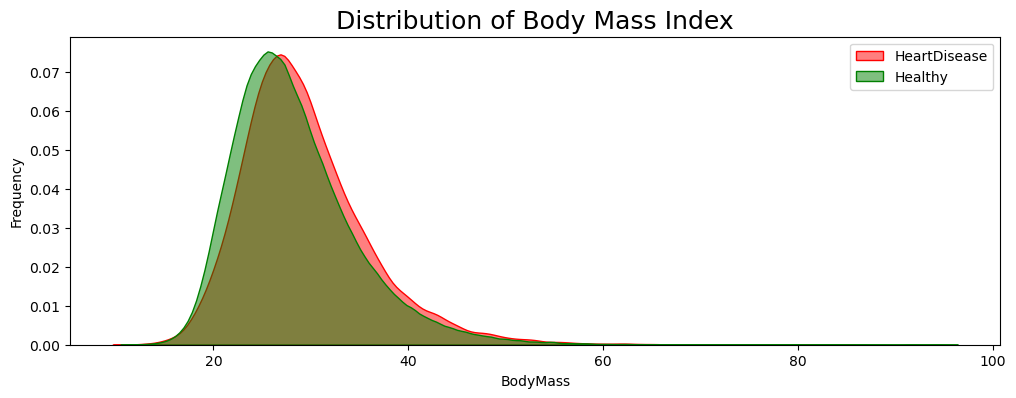

In [10]:
# membuat plot distribusi BMI untuk orang dengan penyakit jantung dan orang sehat.
fig, ax = plt.subplots(figsize = (12,4))

sns.kdeplot(df[df["HeartDisease"]==1]["BMI"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["BMI"], alpha=0.5,shade = True, color="green", label="Healthy", ax = ax)
plt.title('Distribution of Body Mass Index', fontsize = 18)
ax.set_xlabel("BodyMass")
ax.set_ylabel("Frequency")
ax.legend()
plt.show()

# Grafik tersebut menunjukkan distribusi BMI untuk orang dengan penyakit jantung dan orang sehat. 
# Dari grafik tersebut, dapat dilihat bahwa orang dengan penyakit jantung cenderung memiliki BMI yang lebih tinggi daripada orang sehat.
# Dapat dilihat bahwa kurva merah lebih bergeser ke kanan daripada kurva hijau, yang berarti bahwa lebih banyak orang dengan penyakit jantung memiliki BMI yang tinggi.

**Korelasi dan Visualisasi Menggunakan Jaringan Grafik**

In [11]:
pip install networkx==2.8

Note: you may need to restart the kernel to use updated packages.


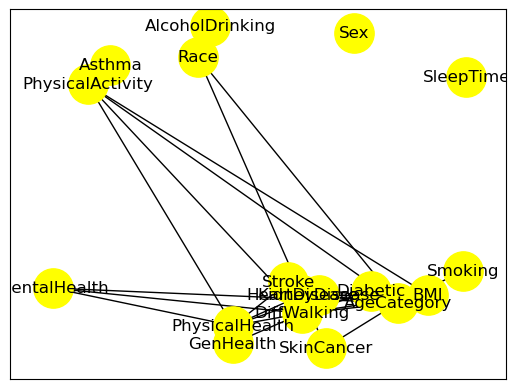

In [13]:
# membuat grafik korelasi faktor faktor
import networkx as nx

CorrelMat= df.corr()

G=nx.Graph()
stocks = CorrelMat.index.values
CorrelMat = np.asmatrix(CorrelMat)
CorrelMat[abs(CorrelMat) < .125] = 0
CorrelMat[abs(CorrelMat) ==1] = 0
G = nx.from_numpy_matrix(CorrelMat)
G = nx.relabel_nodes(G,lambda x: stocks[x])
G.edges(data=True)
nx.draw_networkx(G, with_labels=True, node_size=800, node_color="Yellow")
plt.show(G)


# 

**Korelasi dan Visualisasi Menggunakan Heatmap**

In [14]:
import plotly
import plotly.express as px
fig = px.imshow(df.corr(),color_continuous_scale="Blues")
fig.show()

# untuk melihat korelasi antar variabel numerik dalam dataframe menggunakan heatmap interaktif plotly.
#Heatmap korelasi bisa berguna untuk melihat hubungan linear antar banyak variabel sekaligus. 
# Pada heatmap, korelasi yang tinggi ditunjukkan dengan warna yang semakin gelap. 
# Sedangkan korelasi negatif akan ditunjukkan dengan warna yang berbeda.

**Dapatkan data target dan bangun model ML**

In [15]:
# melakukan data preprocessing agar dataset lebih cocok untuk dianalisa menggunakan model machine learning klasifikasi. 
# Hasilnya adalah dataset yang sudah siap fitur-fiturnya (termasuk BMI kategorikal) dan target variable HeartDisease terpisah.

#Replace nilai BMI kontinu menjadi kategorikal:
df['BMI'].mask(df['BMI']  < 18.5, 0, inplace=True)
df['BMI'].mask(df['BMI'].between(18.5,25), 1, inplace=True)
df['BMI'].mask(df['BMI'].between(25,30), 2, inplace=True)
df['BMI'].mask(df['BMI']  > 30, 3, inplace=True)

#Get the target and remove it from the dataset
target=df["HeartDisease"]
df.drop(["HeartDisease"], axis=1, inplace=True)

In [ ]:
# ------------------------Siapkan data training dan testing-------------------  
X_train,X_test,y_train,y_test = train_test_split(df,target,test_size=.3,random_state=42)

# ------------------------Regresi Logistik-------------------
LogRegModel=LogisticRegression()
LogRegModel.fit(X_train, y_train) 
y_pred_LogReg= LogRegModel.predict(X_test) 

# prediksi probabilitas 
y_pred_probaLogReg = LogRegModel.predict_proba(X_test)[::,1]  

# hitung false postive dan true positive rate
fprLogReg, tprLogReg, _ = metrics.roc_curve(y_test, y_pred_probaLogReg)

Accuracy_LogReg=accuracy_score(y_test, y_pred_LogReg)
print('akurasi Regresi Logistik:', Accuracy_LogReg*100) 
print ("MSE :",mean_squared_error(y_test, y_pred_LogReg)*100)

# ------------------------Decission Tree-------------------
DecTree= DecisionTreeClassifier()
DecTree.fit(X_train, y_train)  
y_pred_DecTree= DecTree.predict(X_test)

# prediksi probabilitas
y_pred_probaDecTree = DecTree.predict_proba(X_test)[::,1]  

# hitung false postive dan true positive rate 
fprDecTree, tprDecTree, _ = metrics.roc_curve(y_test, y_pred_probaDecTree) 

Accuracy_DecTree=accuracy_score(y_test, y_pred_DecTree)
print('akurasi Pohon Keputusan:', Accuracy_DecTree*100)  
print ("MSE :",mean_squared_error(y_test, y_pred_DecTree)*100)  

# ------------------------Random Forest------------------  
RandForest = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
RandForest.fit(X_train, y_train)
y_pred_RandForest= RandForest.predict(X_test)

# prediksi probabilitas
y_pred_probaRandForest = RandForest.predict_proba(X_test)[::,1]   

# hitung false postive dan true positive rate
fprRandForest, tprRandForest, _ = metrics.roc_curve(y_test, y_pred_probaRandForest)  

Accuracy_RandForest=accuracy_score(y_test, y_pred_RandForest) 
print('Random Forest:', Accuracy_RandForest*100)   
print ("MSE :",mean_squared_error(y_test, y_pred_RandForest)*100)  

# ------------------------K-nnC------------------   
from sklearn.neighbors import KNeighborsClassifier
KNNc = KNeighborsClassifier(n_neighbors=3) 
KNNc.fit(X_train, y_train)
y_pred_KNNc= KNNc.predict(X_test)  

# prediksi probabilitas  
y_pred_probaKNNc = KNNc.predict_proba(X_test)[::,1]   

# hitung false postive dan true positive rate
fprKNNc, tprKNNc, _ = metrics.roc_curve(y_test, y_pred_probaKNNc)  

Accuracy_KN

# Kode ini berfungsi untuk membangun model Machine Learning, menguji performanya, dan membandingkan beberapa algoritma Machine Learning 
# yaitu Regresi Logistik, Decision Tree, Random Forest dan KNN dalam menyelesaikan suatu masalah klasifikasi.
# Dengan demikian kita bisa mengetahui algoritma ML mana yang paling cocok untuk kasus ini berdasarkan nilai akurasi dan MSE nya.
# Berdasarkan nilai akurasi dan MSE yang diberikan, dapat dilihat bahwa:

#Akurasi tertinggi ada pada Regresi Logistik (Logistic Regression) yaitu 91.03

#MSE terendah juga dimiliki oleh Regresi Logistik yaitu 8.97

#Sedangkan untuk algoritma lainnya:

#Decision Tree : Akurasi 87.01, MSE 12.99
#Random Forest: Akurasi 90.20, MSE 9.80
#Jadi berdasarkan nilai akurasi dan MSE tersebut, model Regresi Logistik (Logistic Regression) menunjukkan performa paling baik untuk kasus ini.

#Regresi Logistik memiliki akurasi tertinggi yaitu 91.03 dan MSE terendah yaitu 8.97. Oleh karena itu model Regresi Logistik adalah algoritma ML yang paling cocok digunakan untuk kasus klasifikasi ini.#

accuracy Logistic regression: 91.03141985947236
MSE    : 8.968580140527642
accuracy Decision tree: 87.01224092978038
MSE    : 12.987759070219628
Random forest: 90.20173229042379
MSE    : 9.798267709576207


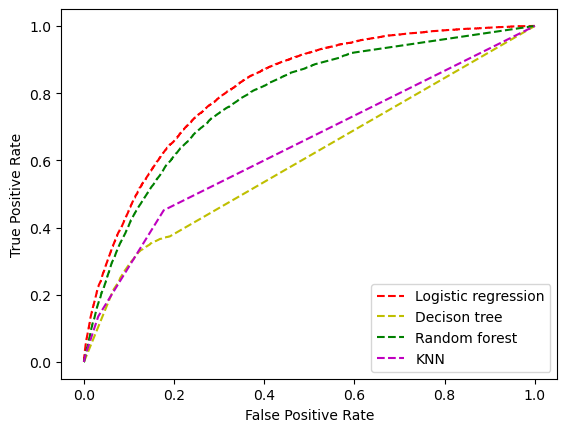

In [17]:
# membuat dan menampilkan ROC Curve dari beberapa model machine learning,
#create ROC curve
#plt.plot(fpr,tpr)
plt.plot(fprLogReg,tprLogReg, 'r--', fprDecTree, tprDecTree, 'y--', 
         fprRandForest, tprRandForest, 'g--',  fprKNNc, tprKNNc, 'm--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.gca().legend(('Logistic regression','Decison tree', 'Random forest', 'KNN'))
plt.show()

# ROC Curve ini berguna untuk melakukan analisa komparatif kinerja setiap model. 
# Model dengan Area Under Curve (AUC) ROC terbesar berarti memiliki performa terbaik.
# Pada grafik, Logistic regression memiliki Garis merah menunjukkan kurva ROC (Receiver Operating Characteristic) untuk model yang ideal.
